In [ ]:
# Set up for running selenium in Google Colab
## You don't need to run this code if you do it in Jupyter notebook, or other local Python setting
%%shell
sudo apt -y update
sudo apt install -y wget curl unzip
wget http://archive.ubuntu.com/ubuntu/pool/main/libu/libu2f-host/libu2f-udev_1.1.4-1_all.deb
dpkg -i libu2f-udev_1.1.4-1_all.deb
wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
dpkg -i google-chrome-stable_current_amd64.deb
CHROME_DRIVER_VERSION=`curl -sS chromedriver.storage.googleapis.com/LATEST_RELEASE`
wget -N https://chromedriver.storage.googleapis.com/$CHROME_DRIVER_VERSION/chromedriver_linux64.zip -P /tmp/
unzip -o /tmp/chromedriver_linux64.zip -d /tmp/
chmod +x /tmp/chromedriver
mv /tmp/chromedriver /usr/local/bin/chromedriver
pip install selenium

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,030 kB]
Ign:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:13 http://archive.ubuntu.com/ubuntu jammy-backports InRelease


In [ ]:
!pip install chromedriver-autoinstaller

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

import time
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
import chromedriver_autoinstaller

# setup chrome options
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') # ensure GUI is off
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

# set path to chromedriver as per your configuration
chromedriver_autoinstaller.install()

# set up the webdriver
driver = webdriver.Chrome(options=chrome_options)

In [ ]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

In [ ]:
!pip install chromedriver-autoinstaller

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

import time
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
import chromedriver_autoinstaller

# setup chrome options
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') # ensure GUI is off
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

# install chromedriver
chromedriver_autoinstaller.install()



'/usr/local/lib/python3.10/dist-packages/chromedriver_autoinstaller/129/chromedriver'

# PlanktonNet

In [ ]:
from urllib.parse import urljoin
import requests
import os
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException, TimeoutException
# URL de la página web


# Configurar el webdriver
driver = webdriver.Chrome(options=chrome_options)

url = "https://planktonnet.awi.de"
search_strings = ['ostreopsis']  # Lista de palabras clave para buscar

try:
    for search_string in search_strings:
        # Abrir la página web
        driver.get(url)

        # Esperar a que la página se cargue completamente
        time.sleep(2)

        # Buscar la barra de entrada y enviar la cadena de búsqueda
        search_bar = driver.find_element(By.ID, 'searchstring')
        search_bar.clear()
        search_bar.send_keys(search_string)
        search_bar.send_keys(Keys.RETURN)

        # Esperar a que los resultados de la búsqueda se carguen
        time.sleep(2)

        # Crear un directorio para guardar las imágenes de esta búsqueda
        os.makedirs(f'imagenes/{search_string}', exist_ok=True)
        page_number = 1

        while True:
            # Obtener el contenido HTML de la página
            html = driver.page_source

            # Usar BeautifulSoup para analizar el HTML
            soup = BeautifulSoup(html, 'html.parser')

            # Encontrar la tabla específica y todas las etiquetas de imagen dentro de ella
            table = soup.find('table', {'id': 'searchimagetable'})
            if table:
                images = table.find_all('img')

                # Descargar y guardar cada imagen
                for index, img in enumerate(images):
                    img_url = img.get('src')
                    if img_url:
                        # Convertir URL relativa a absoluta
                        img_url = urljoin(url, img_url)
                        try:
                            img_response = requests.get(img_url)
                            img_response.raise_for_status()
                            img_data = img_response.content
                            img_filename = os.path.join(f'imagenes/{search_string}', f'page_{page_number}_image_{index}.jpg')
                            with open(img_filename, 'wb') as img_file:
                                img_file.write(img_data)
                            print(f'Imagen guardada en {img_filename}')
                        except requests.exceptions.RequestException as e:
                            print(f'Error al descargar {img_url}: {e}')
            else:
                print("No se encontró la tabla de imágenes.")

            # Intentar encontrar y hacer clic en el botón "next"
            try:
                next_button = driver.find_element(By.XPATH, "//span[contains(text(), 'next')]")
                next_button.click()

                # Esperar a que la nueva página se cargue
                time.sleep(2)
                page_number += 1
            except NoSuchElementException:
                print(f"No se encontró el botón 'next' para la búsqueda '{search_string}'. Terminando la paginación.")
                break

finally:
    # Cerrar el navegador
    driver.quit()


No se encontró el botón 'next' para la búsqueda 'ostreopsis'. Terminando la paginación.


In [ ]:
# prompt: quiero comprimir el archivo en /content/imagenes

!zip -r /content/imagenes.zip /content/imagenes


Streaming output truncated to the last 5000 lines.
updating: content/imagenes/Amphidinium/page_1_image_7.jpg (deflated 2%)
updating: content/imagenes/Laboea/ (stored 0%)
updating: content/imagenes/Laboea/page_1_image_11.jpg (deflated 2%)
updating: content/imagenes/Laboea/page_1_image_12.jpg (deflated 4%)
updating: content/imagenes/Laboea/page_1_image_0.jpg (deflated 1%)
updating: content/imagenes/Laboea/page_1_image_6.jpg (deflated 1%)
updating: content/imagenes/Laboea/page_1_image_4.jpg (deflated 2%)
updating: content/imagenes/Laboea/page_1_image_2.jpg (deflated 1%)
updating: content/imagenes/Laboea/page_1_image_8.jpg (deflated 2%)
updating: content/imagenes/Laboea/page_1_image_5.jpg (deflated 2%)
updating: content/imagenes/Laboea/page_1_image_3.jpg (deflated 2%)
updating: content/imagenes/Laboea/page_1_image_9.jpg (deflated 2%)
updating: content/imagenes/Laboea/page_1_image_13.jpg (deflated 2%)
updating: content/imagenes/Laboea/page_1_image_1.jpg (deflated 1%)
updating: content/image

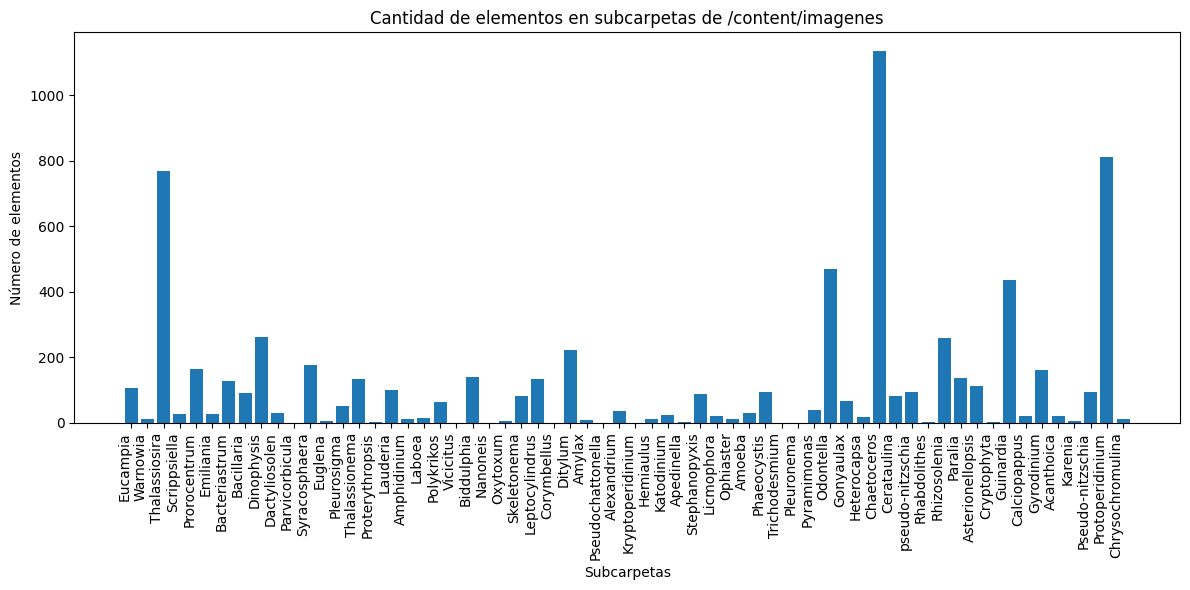

In [ ]:
# prompt: grafica la caaantidad de elementos que hay dentro de las subcaarpetas de /content/imagenes

import os
import matplotlib.pyplot as plt

# Directorio principal
main_dir = '/content/imagenes'

# Obtener los subdirectorios (carpetas) dentro del directorio principal
subdirs = [d for d in os.listdir(main_dir) if os.path.isdir(os.path.join(main_dir, d))]

# Contar los elementos en cada subdirectorio
counts = []
for subdir in subdirs:
    subdir_path = os.path.join(main_dir, subdir)
    count = len(os.listdir(subdir_path))
    counts.append(count)

plt.figure(figsize=(12, 6))

# Crear la gráfica de barras
plt.bar(subdirs, counts)

# Añadir etiquetas y títulos
plt.xlabel('Subcarpetas')
plt.ylabel('Número de elementos')
plt.title('Cantidad de elementos en subcarpetas de /content/imagenes')

# Rotar las etiquetas del eje X para mayor legibilidad
plt.xticks(rotation=90, ha='right')

# Ajustar el diseño para evitar que las etiquetas se superpongan
plt.tight_layout()

# Mostrar la gráfica
plt.show()


# MVCO Dashboard

In [ ]:
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import os


download_dir = "/content"

# Configuración del webdriver
driver = webdriver.Chrome(options=chrome_options)  # Asegúrate de tener el ChromeDriver en tu PATH

chrome_options.add_experimental_option('prefs', {
    "download.default_directory": download_dir,  # Cambia esta ruta por tu directorio de descargas
    "download.prompt_for_download": False,  # No pedir confirmación para descargar
    "download.directory_upgrade": True,
    "safebrowsing.enabled": True
})

driver.get("https://ifcb-data.whoi.edu/timeline?dataset=mvco&bin=D20191228T110458_IFCB010")

wait = WebDriverWait(driver,2)  # Aumentar el tiempo de espera a 20 segundos


def wait_for_download(filename, timeout=30):
    seconds = 0
    while not os.path.exists(os.path.join(download_dir, filename)):
        time.sleep(1)
        seconds += 1
        if seconds > timeout:
            break
    return os.path.exists(os.path.join(download_dir, filename))

def download_files():
    # Obtener el enlace del bin-header para verificar el nombre del bin
    bin_link = wait.until(EC.presence_of_element_located((By.ID, 'bin-header')))
    bin_name = bin_link.text

    # Verificar si el nombre del bin comienza con "2020"
    if bin_name.startswith("D2020"):
        return False

    # Descargar el archivo ZIP
    zip_link = wait.until(EC.presence_of_element_located((By.ID, 'download-zip')))
    zip_url = zip_link.get_attribute('href')
    zip_filename = zip_url.split("/")[-1]
    driver.get(zip_url)
    if not wait_for_download(zip_filename):
        print(f"Failed to download {zip_filename}")

    # Descargar el archivo autoclass
    autoclass_link = wait.until(EC.presence_of_element_located((By.ID, 'download-class-scores')))
    autoclass_url = autoclass_link.get_attribute('href')
    autoclass_filename = autoclass_url.split("/")[-1]
    driver.get(autoclass_url)
    if not wait_for_download(autoclass_filename):
        print(f"Failed to download {autoclass_filename}")

    return True

try:
    while True:
        if not download_files():
            break

        # Navegar al siguiente bin
        next_bin_button = wait.until(EC.element_to_be_clickable((By.ID, 'next-bin')))
        next_bin_button.click()

        # Esperar que la nueva página se cargue completamente
        time.sleep(2)  # Esperar unos segundos para asegurar que la nueva página se cargue
        wait.until(EC.presence_of_element_located((By.ID, 'bin-header')))

finally:
    # Cerrar el navegador
    driver.quit()

Failed to download timeline?dataset=mvco&bin=D20191228T110458_IFCB010#
Failed to download D20191228T110458_IFCB010_class_scores.csv
Failed to download D20191228T112651_IFCB010_class_scores.csv
Failed to download D20191228T114844_IFCB010_class_scores.csv
Failed to download D20191228T121037_IFCB010_class_scores.csv
Failed to download D20191228T123230_IFCB010_class_scores.csv
Failed to download D20191228T125423_IFCB010_class_scores.csv
Failed to download D20191228T131616_IFCB010_class_scores.csv
Failed to download D20191228T133809_IFCB010_class_scores.csv
Failed to download D20191228T140002_IFCB010_class_scores.csv
Failed to download D20191228T142155_IFCB010_class_scores.csv
Failed to download D20191228T144348_IFCB010_class_scores.csv
Failed to download D20191228T150542_IFCB010_class_scores.csv
Failed to download D20191228T152735_IFCB010_class_scores.csv
Failed to download D20191228T154928_IFCB010_class_scores.csv
Failed to download D20191228T161121_IFCB010_class_scores.csv
Failed to down

KeyboardInterrupt: 

In [ ]:
# prompt: quiero descomprimir todos los zip que hay en content en una carpeta

import zipfile
import os

# Directorio donde están los archivos zip
zip_dir = "/content"

# Directorio donde se extraerán los archivos
extract_dir = "/content/extracted_files"

# Crear el directorio de extracción si no existe
os.makedirs(extract_dir, exist_ok=True)

# Iterar sobre los archivos en el directorio zip
for filename in os.listdir(zip_dir):
  if filename.endswith(".zip"):
    filepath = os.path.join(zip_dir, filename)

    # Extraer el archivo zip
    with zipfile.ZipFile(filepath, 'r') as zip_ref:
      zip_ref.extractall(extract_dir)
      print(f"Archivo {filename} extraído en {extract_dir}")


Archivo D20191229T111605_IFCB010.zip extraído en /content/extracted_files
Archivo D20191229T014706_IFCB010.zip extraído en /content/extracted_files
Archivo D20191229T012513_IFCB010.zip extraído en /content/extracted_files
Archivo D20191229T073714_IFCB010.zip extraído en /content/extracted_files
Archivo D20191228T112651_IFCB010.zip extraído en /content/extracted_files
Archivo D20191229T025245_IFCB010.zip extraído en /content/extracted_files
Archivo D20191229T035824_IFCB010.zip extraído en /content/extracted_files
Archivo D20191228T125423_IFCB010.zip extraído en /content/extracted_files
Archivo D20191229T054749_IFCB010.zip extraído en /content/extracted_files
Archivo D20191228T201204_IFCB010.zip extraído en /content/extracted_files
Archivo D20191228T163314_IFCB010.zip extraído en /content/extracted_files
Archivo D20191229T071522_IFCB010.zip extraído en /content/extracted_files
Archivo D20191228T231349_IFCB010.zip extraído en /content/extracted_files
Archivo D20191228T195011_IFCB010.zip e

In [ ]:
# prompt: quiero contar cuantos elementos hay en /content/extracted_files

!ls /content/extracted_files | wc -l


701101


In [ ]:
# prompt: quiero eliminar todos los arhcivos que no sean png de la carpeta /content/extracted_files

!find /content/extracted_files -type f ! -name "*.png" -delete


In [ ]:
!ls /content/extracted_files | wc -l


700922


In [ ]:
# prompt: quiero concatenar todas las filas de los archivos csv de /content

import pandas as pd
import glob

# Lista de archivos CSV en el directorio
csv_files = glob.glob('/content/*.csv')

# Inicializar un DataFrame vacío para almacenar los datos concatenados
all_data = pd.DataFrame()

# Iterar sobre los archivos CSV y concatenar los datos
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    all_data = pd.concat([all_data, df], ignore_index=True)

# Guardar los datos concatenados en un nuevo archivo CSV
all_data.to_csv('/content/concatenated_data.csv', index=False)


In [ ]:
import pandas as pd
data = pd.read_csv('/content/concatenated_data.csv')

In [ ]:
!ls /content/extracted_files

Se han truncado las últimas 5000 líneas del flujo de salida.
D20191228T225156_IFCB010_02872.png  D20191229T151647_IFCB010_00302.png
D20191228T225156_IFCB010_02873.png  D20191229T151647_IFCB010_00303.png
D20191228T225156_IFCB010_02874.png  D20191229T151647_IFCB010_00304.png
D20191228T225156_IFCB010_02875.png  D20191229T151647_IFCB010_00306.png
D20191228T225156_IFCB010_02876.png  D20191229T151647_IFCB010_00307.png
D20191228T225156_IFCB010_02877.png  D20191229T151647_IFCB010_00308.png
D20191228T225156_IFCB010_02878.png  D20191229T151647_IFCB010_00309.png
D20191228T225156_IFCB010_02879.png  D20191229T151647_IFCB010_00310.png
D20191228T225156_IFCB010_02880.png  D20191229T151647_IFCB010_00311.png
D20191228T225156_IFCB010_02881.png  D20191229T151647_IFCB010_00312.png
D20191228T225156_IFCB010_02882.png  D20191229T151647_IFCB010_00313.png
D20191228T225156_IFCB010_02883.png  D20191229T151647_IFCB010_00314.png
D20191228T225156_IFCB010_02884.png  D20191229T151647_IFCB010_00315.png
D20191228T225156

In [ ]:
data.tail()

,pid,Acanthoica_quattrospina,Akashiwo,Alexandrium_catenella,Amphidinium,Amylax,Apedinella,Asterionellopsis_glacialis,Bacillaria,Bacillariophyceae,...,nanoplankton_mix,pennate,pennate_Pseudo-nitzschia,pennate_Thalassionema,pennate_morphotype1,pollen,shellfish_larvae,Bacillariophyceae_morphotype1,unknown2,zooplankton
708974,D20191229T200116_IFCB010_07667,1.000000e-07,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000016,...,9.960000e-01,1.055000e-05,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0
708975,D20191229T200116_IFCB010_07668,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000002,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0
708976,D20191229T200116_IFCB010_07669,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000006,0.0,0.000000,...,6.600000e-07,5.400000e-07,0.000000e+00,0.0,0.0,0.0,0.0,5.000000e-07,2.400000e-07,0.0
708977,D20191229T200116_IFCB010_07670,6.000000e-08,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000200,...,9.960000e-01,1.340000e-04,6.000000e-08,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0
708978,D20191229T200116_IFCB010_07671,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000004,0.0,0.000025,...,3.160000e-06,1.670000e-06,0.000000e+00,0.0,0.0,0.0,0.0,1.080000e-05,0.000000e+00,0.0


In [ ]:
import pandas as pd
import shutil
import os

data = pd.read_csv('/content/concatenated_data.csv')

extracted_files_dir = '/content/extracted_files'
# Crea un directorio para cada carpeta si no existe
unique_labels = data.columns[1:]  # Excluye la columna 'pid'
for label in unique_labels:
    os.makedirs(os.path.join(extracted_files_dir, label), exist_ok=True)

# Organiza las imágenes
for idx, row in data.iterrows():
    pid = row['pid']
    # Excluye la columna 'pid' y encuentra la columna con el mayor valor, solo considera columnas numéricas
    numeric_row = row.drop(labels=['pid']).apply(pd.to_numeric, errors='coerce')
    max_label = numeric_row.idxmax()

    # Mueve la imagen correspondiente a la carpeta del valor máximo
    src_path = os.path.join(extracted_files_dir, f'{pid}.png')  # Asegúrate de que las imágenes tengan extensión .jpg
    dest_dir = os.path.join(extracted_files_dir, max_label)
    dest_path = os.path.join(dest_dir, f'{pid}.png')

    # Mueve el archivo si existe
    if os.path.exists(src_path):
        shutil.move(src_path, dest_path)
    else:
        print(f"File {src_path} does not exist.")

print("Files organized successfully.")

Se han truncado las últimas 5000 líneas del flujo de salida.
File /content/extracted_files/D20191228T110458_IFCB010_03182.png does not exist.
File /content/extracted_files/D20191228T110458_IFCB010_03183.png does not exist.
File /content/extracted_files/D20191228T110458_IFCB010_03184.png does not exist.
File /content/extracted_files/D20191228T110458_IFCB010_03185.png does not exist.
File /content/extracted_files/D20191228T110458_IFCB010_03186.png does not exist.
File /content/extracted_files/D20191228T110458_IFCB010_03187.png does not exist.
File /content/extracted_files/D20191228T110458_IFCB010_03188.png does not exist.
File /content/extracted_files/D20191228T110458_IFCB010_03189.png does not exist.
File /content/extracted_files/D20191228T110458_IFCB010_03190.png does not exist.
File /content/extracted_files/D20191228T110458_IFCB010_03191.png does not exist.
File /content/extracted_files/D20191228T110458_IFCB010_03192.png does not exist.
File /content/extracted_files/D20191228T110458_I

In [ ]:
# prompt: comprime en zip la carpeta /content/extracted_files junto con el archivo /content/concatenated_data.csv

import shutil
import zipfile

# Nombre del archivo zip
zip_filename = "/content/datos_plancton.zip"

# Directorios y archivos a incluir en el zip
files_to_zip = [
    "/content/extracted_files",
    "/content/concatenated_data.csv"
]

# Crear el archivo zip
with zipfile.ZipFile(zip_filename, 'w') as zip_file:
    for file_or_dir in files_to_zip:
        if os.path.isdir(file_or_dir):
            # Comprimir un directorio
            for root, dirs, files in os.walk(file_or_dir):
                for file in files:
                    zip_file.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), file_or_dir))
        else:
            # Comprimir un archivo individual
            zip_file.write(file_or_dir, os.path.basename(file_or_dir))

print(f"Archivo {zip_filename} creado exitosamente.")


Archivo /content/datos_plancton.zip creado exitosamente.


In [ ]:
# prompt: haz una copia del archivo /content/datos_plancton.zip en /content/drive/Shareddrives/Proyecto Terminal ANN Plankton/Plankton

!cp /content/datos_plancton.zip /content/drive/Shareddrives/Proyecto\ Terminal\ ANN\ Plankton/Plankton


In [ ]:
# prompt: quiero un conteo de cuantos elementos por subcarpeta hay en /content/extracted_files en un dataframe

import os
import pandas as pd

# Directorio base
base_dir = '/content/extracted_files'

# Obtener lista de subcarpetas
subfolders = [f for f in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, f))]

# Contar elementos en cada subcarpeta
counts = {folder: len(os.listdir(os.path.join(base_dir, folder))) for folder in subfolders}

# Crear DataFrame
df = pd.DataFrame(list(counts.items()), columns=['Subcarpeta', 'Conteo'])

print(df.sort.to_string())


                                      Subcarpeta  Conteo
0                             Pelagostrobilidium       9
1                                 Leptocylindrus    8011
2                           Euplotes_morphotype1       0
3                       Stenosemella_morphotype1       1
4                                Proterythropsis      62
5                         Strombidium_inclinatum       2
6                        Chaetoceros_tenuissimus     638
7                                       Balanion    1000
8                                  Coscinodiscus     144
9            Thalassiosira_TAG_external_detritus    3942
10                               Copepod_nauplii       5
11                                 Trichodesmium     302
12                             Dinophysis_tripos       0
13                                       Euglena      56
14                                   Pyramimonas    8669
15                               Laboea_strobila       3
16                             

In [ ]:
# prompt: quiero ordenar el dataframe segun la caolumna subcarpeta

# Ordenar el DataFrame por la columna 'Subcarpeta'
df_sorted = df.sort_values('Subcarpeta')

# Imprimir el DataFrame ordenado
print(df_sorted.to_string())


                                      Subcarpeta  Conteo
49                                    Acantharia       1
85                       Acanthoica_quattrospina    3561
140                                     Akashiwo       0
86                         Alexandrium_catenella      51
153                                       Amoeba     832
36                                   Amphidinium     391
56                                        Amylax      56
31                                    Apedinella    1658
65                    Asterionellopsis_glacialis    2104
130                                   Bacillaria       4
57                             Bacillariophyceae   15004
74                 Bacillariophyceae_morphotype1     583
48                                 Bacteriastrum      34
7                                       Balanion    1000
88                                    Biddulphia       4
120                                 Calciopappus     187
113                   Calciosol

In [ ]:
'Acanthoica', 'Akashiwo', 'Alexandrium', 'Amoeba',
       'Amphidinium', 'Amylax', 'Apedinella', 'Asterionellopsis',
       'Bacillaria', 'Bacteriastrum', 'Biddulphia', 'Calciopappus',
       'Cerataulina', 'Ceratium', 'Chaetoceros', 'Chrysochromulina',
       'Cochlodinium', 'Corethron', 'Corymbellus', 'Coscinodiscus',
       'Cryptophyta', 'Cylindrotheca', 'Dactyliosolen', 'Delphineis',
       'Dictyocha', 'Dinobryon', 'Dinophysis', 'Ditylum', 'Emiliania',
       'Ephemera', 'Eucampia', 'Euglena', 'Gonyaulax', 'Guinardia',
       'Gyrodinium', 'Hemiaulus', 'Heterocapsa', 'Karenia',
       'Katodinium', 'Kryptoperidinium', 'Laboea', 'Lauderia',
       'Leptocylindrus', 'Licmophora', 'Nanoneis', 'Odontella',
       'Ophiaster', 'ostreopsis','Oxytoxum', 'Paralia', 'Parvicorbicula',
       'Phaeocystis', 'Pleuronema', 'Pleurosigma', 'Polykrikos',
       'Prorocentrum', 'Proterythropsis', 'Protoperidinium',
       'Pseudo-nitzschia', 'Pseudochattonella', 'Pyramimonas',
       'Rhabdolithes', 'Rhizosolenia', 'Scrippsiella', 'Skeletonema',
       'Stephanopyxis', 'Syracosphaera', 'Thalassionema', 'Thalassiosira',
       'Trichodesmium', 'Vicicitus', 'Warnowia',

# WoRMS

In [ ]:
import sys
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import chromedriver_autoinstaller
from bs4 import BeautifulSoup

# Lista de palabras para buscar
palabras = ['acanthoica', 'akashiwo', 'alexandrium', 'amoeba',
       'amphidinium', 'amylax', 'apedinella', 'asterionellopsis',
       'bacillaria', 'bacteriastrum', 'biddulphia', 'calciopappus',
       'cerataulina', 'ceratium', 'chaetoceros', 'chrysochromulina',
       'cochlodinium', 'corethron', 'corymbellus', 'coscinodiscus',
       'cryptophyta', 'cylindrotheca', 'dactyliosolen', 'delphineis',
       'dictyocha', 'dinobryon', 'dinophysis', 'ditylum', 'emiliania',
       'ephemera', 'eucampia', 'euglena', 'gonyaulax', 'guinardia',
       'gyrodinium', 'hemiaulus', 'heterocapsa', 'karenia', 'katodinium',
       'kryptoperidinium', 'laboea', 'lauderia', 'leptocylindrus',
       'licmophora', 'nanoneis', 'odontella', 'ophiaster', 'ostreopsis',
       'oxytoxum', 'paralia', 'parvicorbicula', 'phaeocystis',
       'pleuronema', 'pleurosigma', 'polykrikos', 'prorocentrum',
       'proterythropsis', 'protoperidinium', 'pseudo-nitzschia',
       'pseudochattonella', 'pyramimonas', 'rhabdolithes', 'rhizosolenia',
       'scrippsiella', 'skeletonema', 'stephanopyxis', 'syracosphaera',
       'thalassionema', 'thalassiosira', 'trichodesmium', 'vicicitus',
       'warnowia']  # Generos de fitplancton

# Configurar el navegador con las opciones
driver = webdriver.Chrome(options=chrome_options)

# Definir las jerarquías esperadas como columnas
jerarquias_estandar = [
    "Kingdom", "Subkingdom", "Infrakingdom", "Phylum", "Subphylum",
    "Infraphylum", "Division", "Subdivision", "Class", "Subclass",
    "Infraclass", "Superorder", "Order", "Suborder", "Infraorder",
    "Family", "Subfamily", "Genus", "Species"
]

# Inicializar un DataFrame para almacenar todos los resultados
df_total = pd.DataFrame(columns=jerarquias_estandar + ["Palabra"])

# Iterar sobre la lista de palabras
for palabra in palabras:
    # Abre la página web deseada
    driver.get("https://www.marinespecies.org/aphia.php?p=search")

    # Esperar a que la página cargue completamente
    time.sleep(1)

    # Buscar el campo de entrada por su ID e ingresar la palabra actual
    input_field = driver.find_element(By.ID, "tName")
    input_field.clear()  # Limpiar el campo de entrada
    input_field.send_keys(palabra)

    # Simular Enter para realizar la búsqueda
    input_field.send_keys(Keys.RETURN)

    # Esperar unos segundos para que los resultados se procesen
    time.sleep(2)

    # Buscar el primer elemento de la clase "list-group aphia_core_list_group_hover"
    try:
        first_item = driver.find_element(By.CSS_SELECTOR, ".list-group.aphia_core_list_group_hover li:first-child a")
        first_item.click()  # Hacer clic en el enlace del primer elemento

        # Esperar a que la nueva página cargue
        time.sleep(2)

        # Obtener el HTML de la nueva página (detalles del primer elemento)
        page_source = driver.page_source

        # Analizar el HTML con BeautifulSoup
        soup = BeautifulSoup(page_source, 'html.parser')

        # Encontrar el elemento ol con la clase deseada
        breadcrumb_ol = soup.find('ol', class_='breadcrumb aphia_core_breadcrumb-classification leave_image_space')

        # Inicializar un diccionario para almacenar jerarquías y nombres
        data = {jerarquia: None for jerarquia in jerarquias_estandar}

        # Verificar si se encontró el breadcrumb_ol
        if breadcrumb_ol:
            # Extraer cada elemento li dentro del ol
            for li in breadcrumb_ol.find_all('li'):
                # Encontrar el enlace
                a_tag = li.find('a')
                if a_tag:  # Asegurarse de que a_tag no sea None
                    # Extraer el nombre (texto dentro del enlace)
                    nombre = a_tag.text.strip()
                    # Extraer la jerarquía (texto entre paréntesis)
                    jerarquia = li.text.strip().split('(')[-1].replace(')', '').strip()

                    # Si la jerarquía es reconocida, guardar el nombre
                    if jerarquia in jerarquias_estandar:
                        data[jerarquia] = nombre

        # Convertir el diccionario a un DataFrame temporal y agregar la palabra
        df_temp = pd.DataFrame([data])
        df_temp["Palabra"] = palabra

        # Concatenar el DataFrame de esta palabra con el total
        df_total = pd.concat([df_total, df_temp], ignore_index=True)

    except Exception as e:
        print(f"Error al procesar la palabra '{palabra}': {e}")

# Guardar el DataFrame total en un archivo CSV
df_total.to_csv("jerarquia_nombres_total.csv", index=False, encoding='utf-8')

# Cerrar el navegador
driver.quit()

print("Búsquedas realizadas para todas las palabras y resultados guardados en 'jerarquia_nombres_total.csv'.")

Búsquedas realizadas para todas las palabras y resultados guardados en 'jerarquia_nombres_total.csv'.


In [ ]:
df = pd.read_csv('jerarquia_nombres_total.csv')

In [ ]:
print(df.to_string())

      Kingdom      Subkingdom Infrakingdom            Phylum           Subphylum     Infraphylum     Division     Subdivision                Class              Subclass  Infraclass                         Superorder                           Order      Suborder  Infraorder                          Family                  Subfamily              Genus  Species            Palabra
0   Chromista        Hacrobia          NaN        Haptophyta        Haptophytina             NaN          NaN             NaN    Coccolithophyceae     Prymnesiophycidae         NaN                                NaN                Syracosphaerales           NaN         NaN               Rhabdosphaeraceae                        NaN         Acanthoica      NaN         acanthoica
1   Chromista          Harosa    Alveolata           Myzozoa             Dinozoa  Dinoflagellata          NaN             NaN          Dinophyceae                   NaN         NaN                                NaN                   Gymnod